- OpenClassrooms Project 5, Data Scientist
- Author : Oumeima EL GHARBI
- Date : September, October 2022

## Part II : Trying different Clustering Algorithms and Modelling

#### Importing libraries

In [590]:
import matplotlib.pyplot as plt
import pandas as pd
%reset -f

from functions import *
from graphing_functions import *

from sklearn.preprocessing import scale, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

import pickle

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [591]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "dataset_rfm.csv"

## I) RFM Clustering

#### Importing dataset

In [592]:
dataset_rfm = load_data(input_path, input_filename)

___Loading raw dataset___
Initial shape : (95420, 4)


In [593]:
dataset_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


We had kept the customer id saved in the csv files, we drop it now.

In [594]:
X = dataset_rfm.drop("customer_unique_id", axis=1).copy()
X.head()

,Recency,Frequency,Monetary
0,115,1,129.90
1,118,1,18.90
2,541,1,69.00
3,325,1,25.99
4,292,1,180.00


#### Standardisation : Scaling

In [595]:
X_norm = X.copy()
X_norm[X_norm.columns] = scale(X)
print(X_norm.shape)

X_norm.head()

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566


In [596]:
X_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


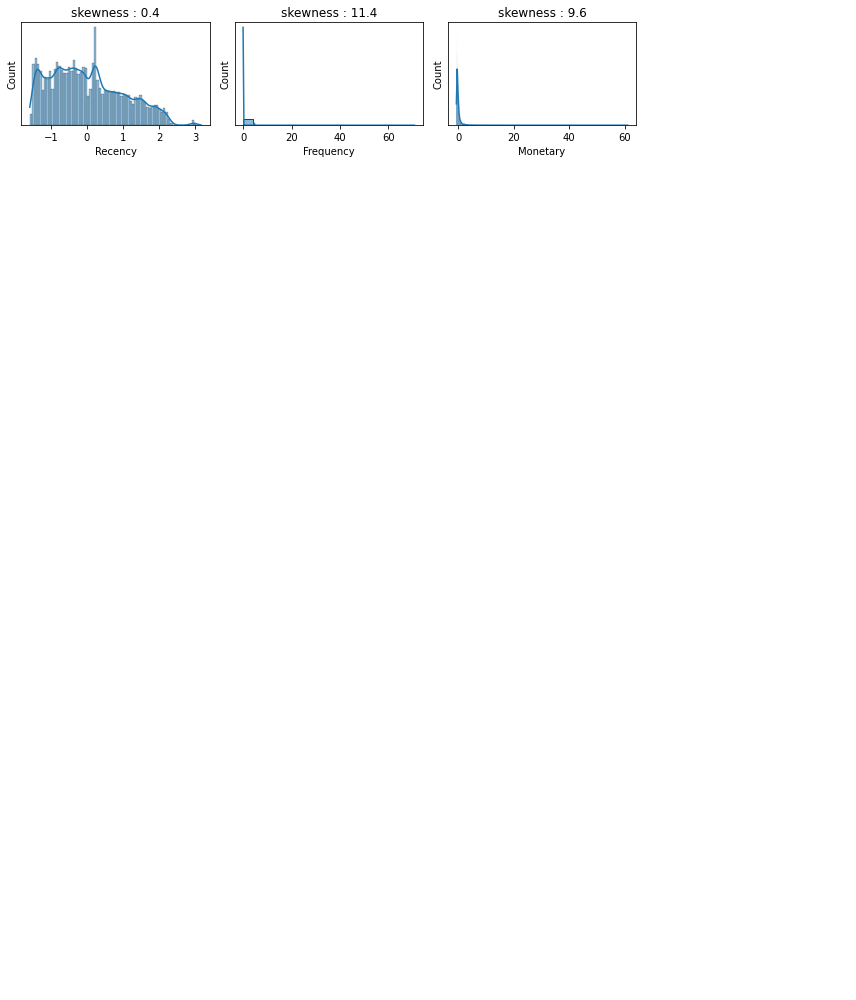

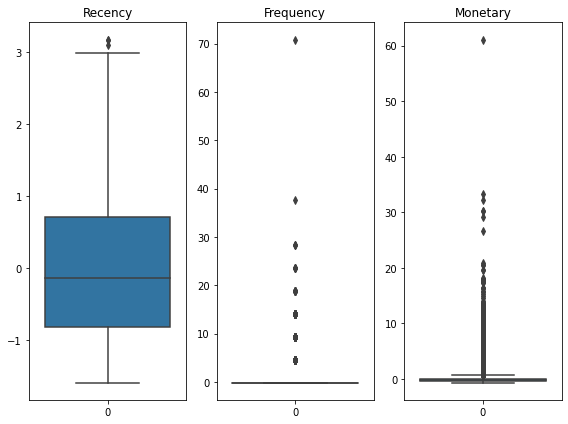

In [597]:
density_histplot(X_norm)
display_boxplot(X_norm)

#### Standardisation : Standard Scaler
We have tried to standardise the data using Scale or StandardScaler.
Since we do not have a train/test set, in this case these two methods are the same.

In [598]:
X_std = X.copy()
scaler = StandardScaler()

X_std[X_std.columns] = scaler.fit_transform(X_std)
print(X_std.shape)

X_std.head()

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566


In [599]:
X_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


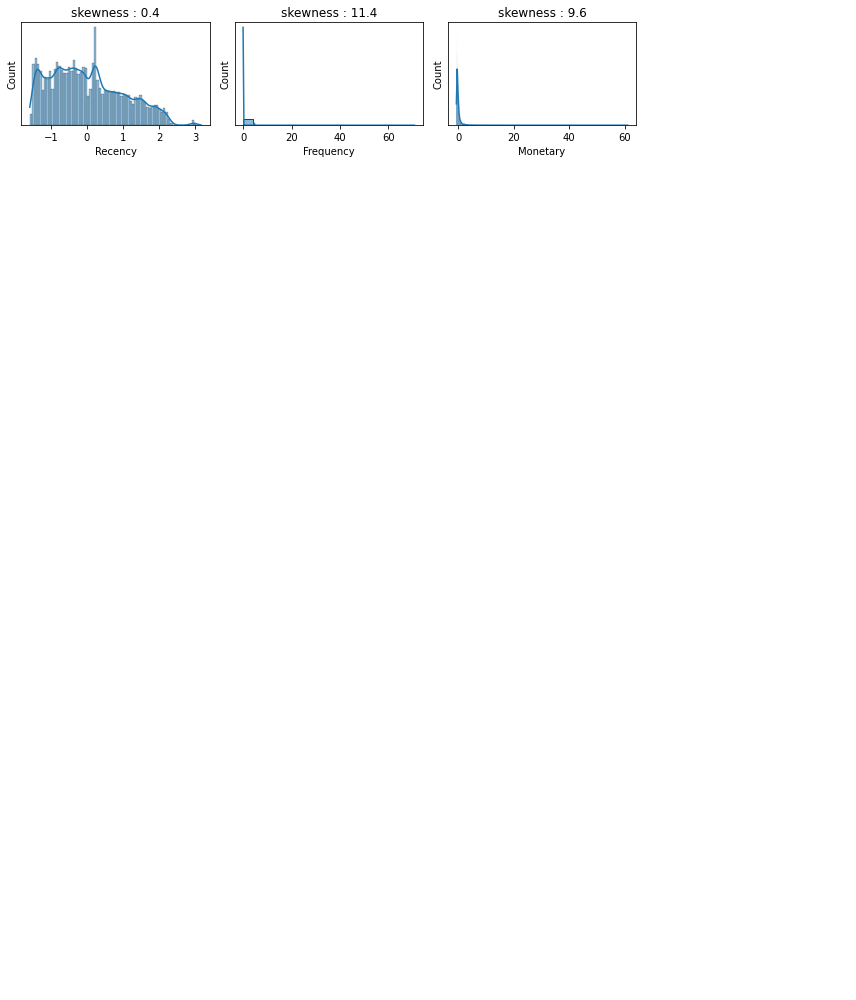

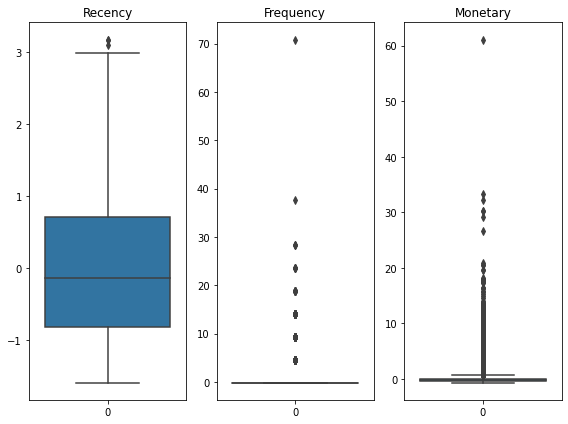

In [600]:
density_histplot(X_std)
display_boxplot(X_std)

##### Verifying that scale and std scaler are the same here

In [601]:
d = pd.concat([X_norm, X_std])
d.shape

(190840, 3)

In [602]:
d.drop_duplicates(keep=False)

,Recency,Frequency,Monetary


#### Creating a sample of the dataset

##### ATTENTION : we use only 5000 clients over 95000 for these some tryouts.
t-SNE, DBSCAN and Hierarchical Clustering cannot process too much data, so we use a reduced dataset for the tryouts.


In [603]:
X_norm_sample = X_norm.copy()
X_norm_sample = X_norm_sample.sample(n=5000, random_state=0, ignore_index=True) # we need to reset the index to get a box plot

X_norm_sample.shape

(5000, 3)

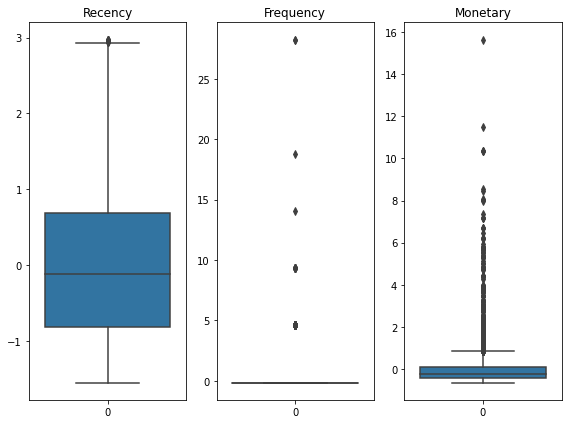

___Density distribution___


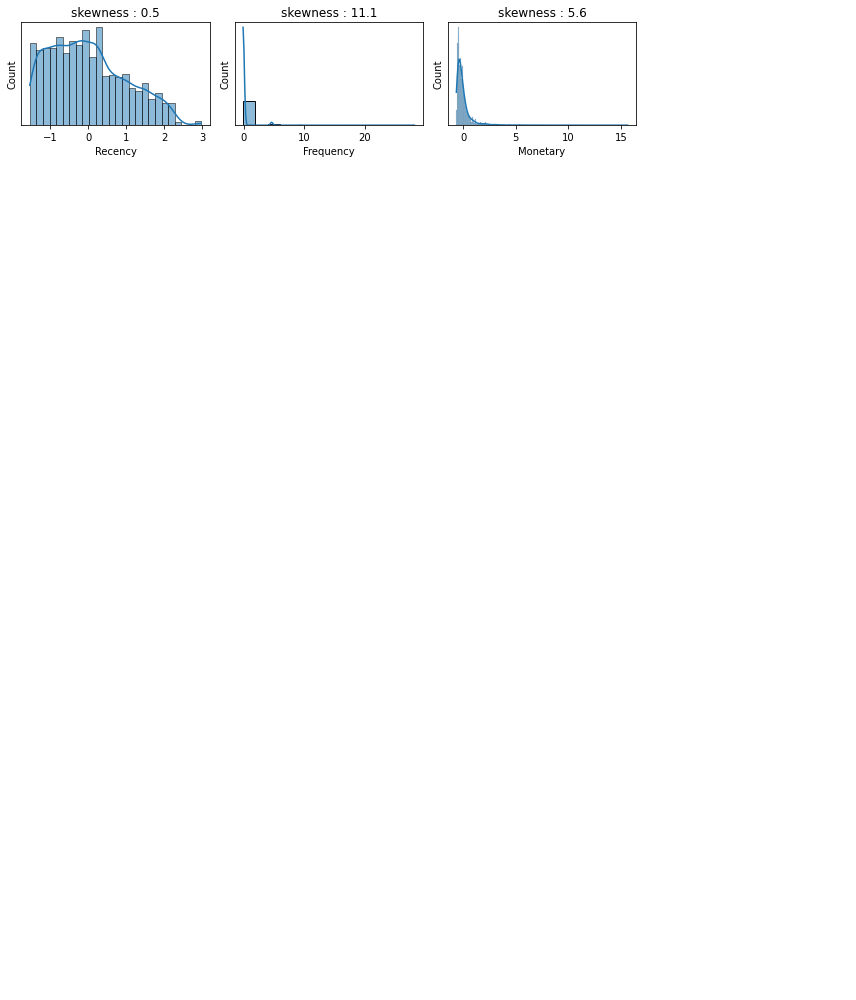

In [604]:
display_boxplot(X_norm_sample)
density_histplot(X_norm_sample)

#### PCA : Principal Component Analysis, global structure

In [605]:
pca = PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())

[0.36938074 0.70282884]


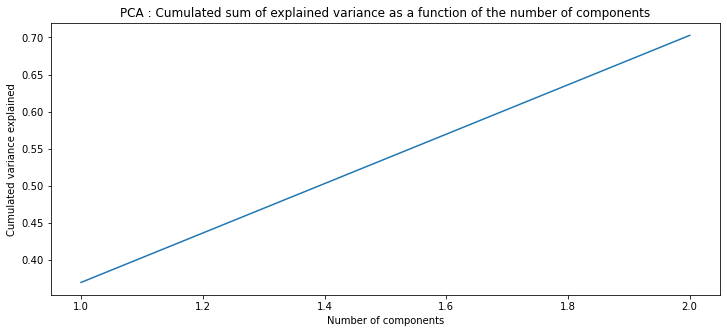

In [606]:
display_pca_variance_cumsum(pca_fitted=pca)

In [607]:
print("List of variance explained per component :", pca.explained_variance_ratio_)
print("Sum of the variance explained per component :", pca.explained_variance_ratio_.sum())

List of variance explained per component : [0.36938074 0.3334481 ]
Sum of the variance explained per component : 0.7028288419547439


In [608]:
# projeter X sur les composantes principales
X_pca = pca.transform(X_norm)
print("The PCA with 2 components explains", round(pca.explained_variance_ratio_.cumsum()[1], 3) * 100, "% of the variance.")

The PCA with 2 components explains 70.3 % of the variance.


In [609]:
#X_pca

##### Projection of PCA components in 2D

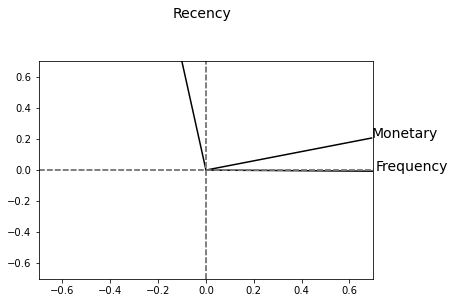

In [610]:
display_pca_components(pca_fit=pca, X_norm=X_norm)

##### Visualizing PCA components for the sample dataset

[0.41106477 0.73319995]


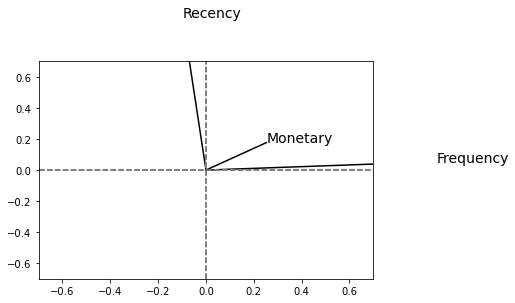

In [611]:
# sample :
pca_sample = PCA(n_components=2)
pca_sample.fit(X_norm_sample)
print(pca_sample.explained_variance_ratio_.cumsum())
X_pca_sample = pca_sample.transform(X_norm_sample)

display_pca_components(pca_fit=pca_sample, X_norm=X_norm_sample)

#### t-SNE : local structure

We tried to visualize the data using t-SNE, however in our case the fit takes too much time so we use t-SNE on our sample.

In [612]:
tsne_sample = TSNE(n_components=2, init='pca', learning_rate='auto')
X_tsne_sample = tsne_sample.fit_transform(X_norm_sample)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



### 1) Hierarchical clustering / HCA : Hierarchical Cluster Analysis

HCA takes too much time to run on all of the dataset so we use here the sample dataset.

##### Getting the best number of clusters automatically

In [613]:
hierarchical_cls_sample = AgglomerativeClustering().fit(X_norm_sample)

In [614]:
hierarchical_cls_sample.n_clusters

2

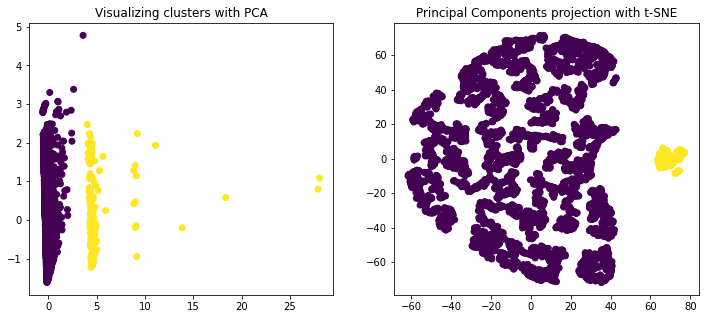

In [615]:
#hierarchical_cls_sample.labels_
display_pca_tsne(X_pca_sample, X_tsne_sample, cls=hierarchical_cls_sample)

In [616]:
silhouette_score(X_norm_sample, hierarchical_cls_sample.labels_)

0.7404840374356035

##### Choosing the number of clusters

In [617]:
hierarchical_cls_sample_n = AgglomerativeClustering(n_clusters=5).fit(X_norm_sample)

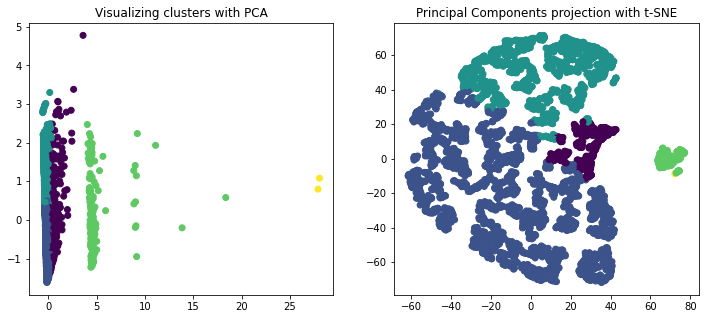

In [618]:
display_pca_tsne(X_pca_sample, X_tsne_sample, cls=hierarchical_cls_sample_n)

In [619]:
silhouette_score(X_norm_sample, hierarchical_cls_sample_n.labels_)

0.4962690326790877

Conclusion : we won't use a HCA clsutering since the running time is too long.
We can only try it on a sample.

### 2) DBSCAN

**eps** (float, default=0.5)
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

**min_samples** (int, default=5)
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [620]:
list_eps = [i / 2 for i in range(1, 7)]
list_eps

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

Hyperparameter epsilon =  0.5
Hyperparameter epsilon =  1.0
Hyperparameter epsilon =  1.5
Hyperparameter epsilon =  2.0
Hyperparameter epsilon =  2.5
Hyperparameter epsilon =  3.0


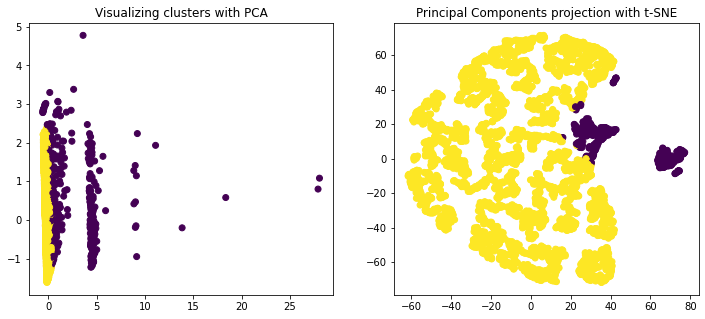

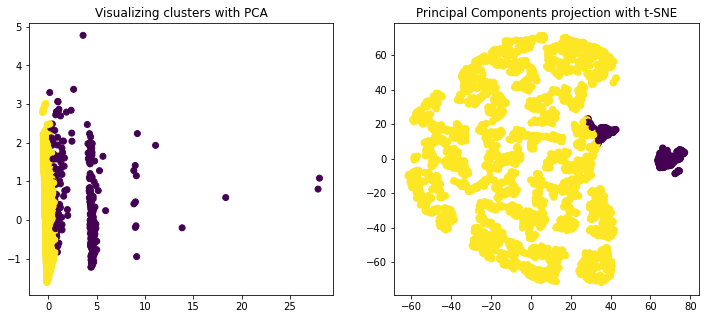

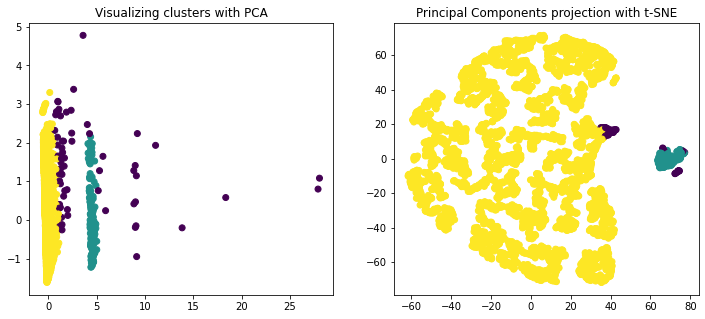

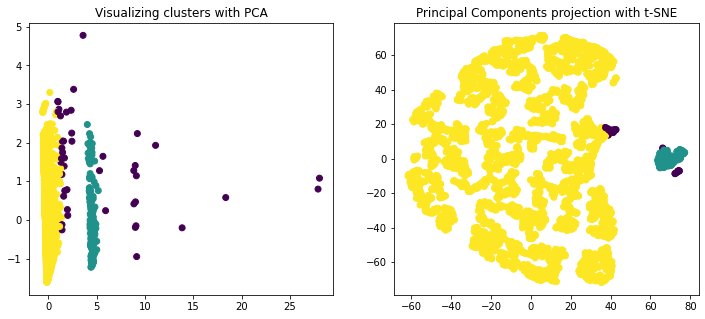

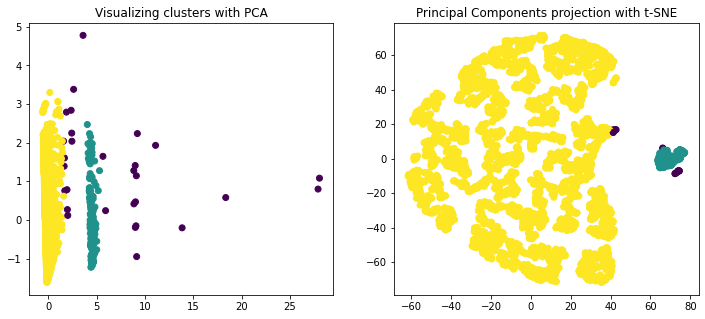

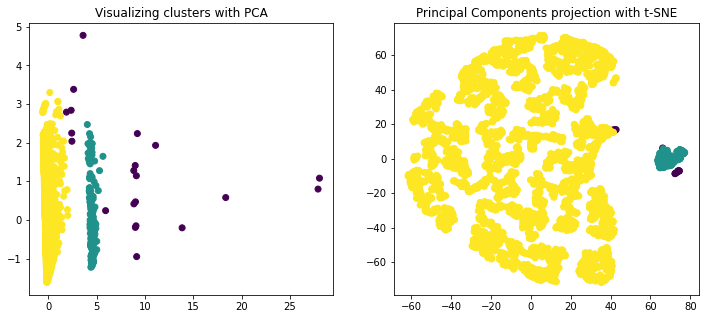

In [621]:
for eps in list_eps:
    print("Hyperparameter epsilon = ", eps)
    dbscan_cls_sample = DBSCAN(eps=eps, min_samples=100, n_jobs=-1).fit(X_norm_sample)
    display_pca_tsne(X_pca_sample, X_tsne_sample, cls=dbscan_cls_sample)

Conclusion : DBSCAN is a density based clustering algorithm. In our case, our clients are not connected by density.
Indeed, what differences the clients is the recency in majority (in our database, more than 97% of clients only ordered once).
Also, the runnin time is too long, so we won't use DBSCAN.


### 3) K-Means Clustering

#### 1) Using sample X_norm_sample

##### 1) First tryout

In [622]:
kmeans_cluster = KMeans(n_clusters=6, verbose=0, random_state=0)
kmeans_cluster.fit(X_norm_sample)

# kmeans_cluster.labels_

KMeans(n_clusters=6, random_state=0)

In [623]:
kmeans_cluster.inertia_

3072.937906034521

In [624]:
silh = silhouette_score(X_norm_sample, kmeans_cluster.labels_)
silh

0.43306613133919475

##### Visualizing

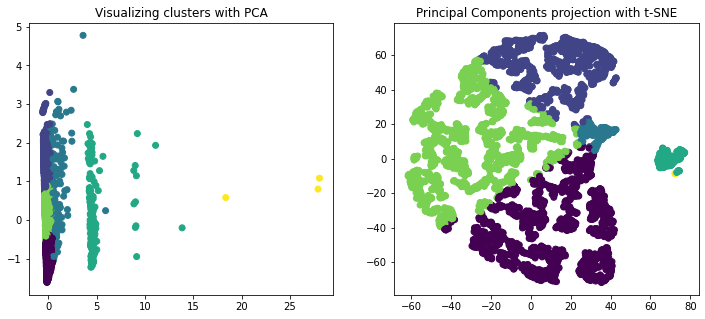

In [625]:
display_pca_tsne(X_pca_sample, X_tsne_sample, cls=kmeans_cluster)

##### 2) Searching the best number of clusters K

In [626]:
nb_clusters = 15

In [627]:
inertia = {}

for num_clusters in range(2, nb_clusters + 1):
    #print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                    random_state=0).fit(X_norm_sample) # verbose=0,
    # we add to the dict of inertia the inertia for the K-Means
    inertia[num_clusters] = kmeans_cluster.inertia_

In [628]:
#inertia

K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

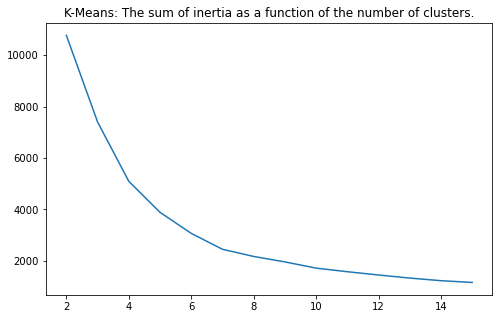

In [629]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

Conclusion :
K-Means minimizes the sum of inertia.
We can see an elbow for k = 5 so k = 5 seems like a good candidate with this metric.

##### Silhouette score

We want the silhouette score to be close to 1.


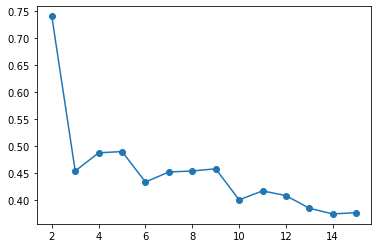

In [630]:
silhouettes = []

for num_clusters in range(2, nb_clusters + 1):
    cls = KMeans(n_clusters=num_clusters, random_state=0) # #init='random', n_init=1)
    cls.fit(X_norm_sample)

    silh = silhouette_score(X_norm_sample, cls.labels_)
    silhouettes.append(silh)

print("We want the silhouette score to be close to 1.")
plt.plot(range(2, nb_clusters + 1), silhouettes, marker='o')

Conclusion :
We want the silhouette score to be close to 1.
Here, k = 2 has the highest silhouette score but we need more clusters.
k = 3 to  k = 9 seem like good candidates.

##### Davies Bouldin score :
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

We want the silhouette score to be close to 1.


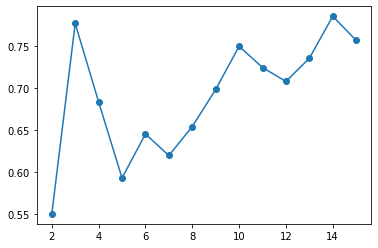

In [631]:
list_davies_bouldin = []

for num_clusters in range(2, nb_clusters + 1):
    cls = KMeans(n_clusters=num_clusters, random_state=0) # #init='random', n_init=1)
    cls.fit(X_norm_sample)

    db = davies_bouldin_score(X_norm_sample, cls.labels_)
    list_davies_bouldin.append(db)

print("We want the silhouette score to be close to 1.")
plt.plot(range(2, nb_clusters + 1), list_davies_bouldin, marker='o')

Conclusion :
The best number of clusters that minimizes the DB index is k = 2.
However, for our segmentation, we need more clusters, k = 5 looks like a good candidate with this metric.

#### 2) Real dataset X_norm

To evaluate the K-Means clustering we will use the elbow graph.
Computing scores like the silhouette score takes too much time.

##### Choosing the best value for K

In [632]:
nb_clusters = 15

In [633]:
inertia = {}

for num_clusters in range(1, nb_clusters + 1):
    #print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                            verbose=0,
                            random_state=0).fit(X_norm)
    inertia[num_clusters] = kmeans_cluster.inertia_

K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

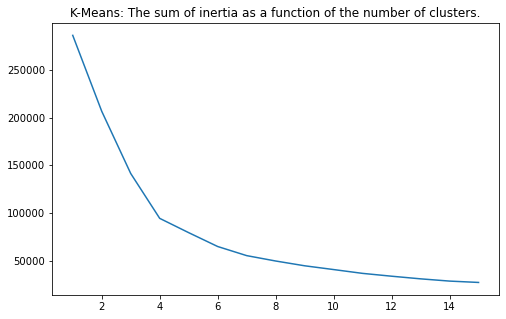

In [634]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

We have an elbow at K = 4
K = 4 or K = 5 seem like good candidates.

##### Choosing K = 4

In [635]:
best_kmeans = KMeans(n_clusters=4,
                            verbose=0,
                            random_state=0).fit(X_norm)

We display to PCA visualisation from above

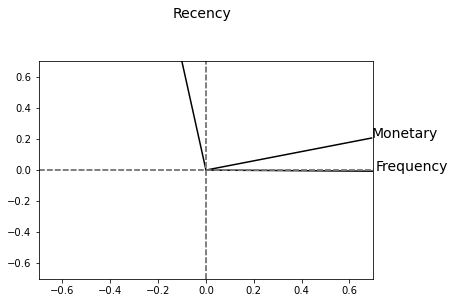

In [636]:
display_pca_components(pca, X_norm)

Text(0.5, 1.0, 'Visualizing clusters with PCA')

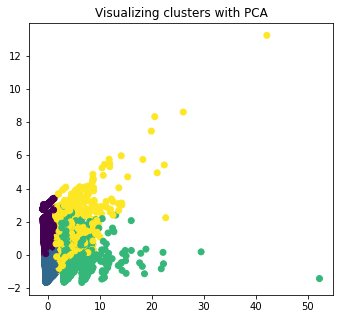

In [637]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=best_kmeans.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

In [638]:
# Saving clustering model
model = {'kmeans_rfm': best_kmeans}
filename = './model/kmeans_rfm.pkl'

with open(filename, "wb") as f: # wb writing
    pickle.dump(model, f)

##### Analysis

In [639]:
best_kmeans_dataset = dataset_rfm.copy()

# we add a column that puts each customer into a cluster
best_kmeans_dataset['Customer_cluster'] = best_kmeans.labels_ # best_kmeans_dataset['Customer_cluster'] = best_kmeans.predict(X_norm)
display(best_kmeans_dataset)

,customer_unique_id,Recency,Frequency,Monetary,Customer_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,1
2,0000f46a3911fa3c0805444483337064,541,1,69.00,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,0
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,0
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,3
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,0
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,0
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,1


In [640]:
print("We get the total number of customers per cluster.")
total_customers_per_cluster = best_kmeans_dataset[["Customer_cluster"]].value_counts()
total_customers_per_cluster

We get the total number of customers per cluster.


Customer_cluster
1                   51886
0                   38378
2                    2883
3                    2273
dtype: int64

In [641]:
print("We make a dataframe with the mean value per feature per cluster.")

avg_cluster = best_kmeans_dataset.groupby("Customer_cluster").agg(
    {
        'customer_unique_id': 'count',
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
    }
).rename(columns={'customer_unique_id': 'Nb customers',
                  'Recency': 'Avg Recency',
                  'Frequency': 'Avg Frequency',
                  'Monetary': 'Avg Monetary'})
avg_cluster

We make a dataframe with the mean value per feature per cluster.


,Nb customers,Avg Recency,Avg Frequency,Avg Monetary
Customer_cluster,,,,
0,38378,392.691438,1.000000,114.481193
1,51886,132.518810,1.000000,113.596573
2,2883,225.184530,2.114811,243.049823
3,2273,243.351518,1.014078,1145.314571


##### Analysing the total number of customers per cluster
We analyse the total number of customers per cluster

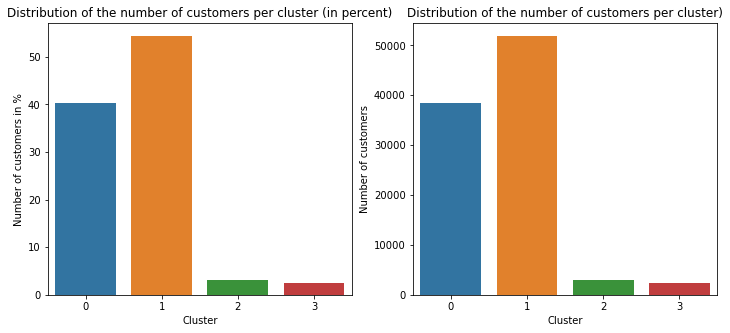

In [642]:
display_barplot_total_customers(grouped_df=avg_cluster)

##### Analysing the clustering
We analyse the average Recency, Frequency and Monetary values per cluster

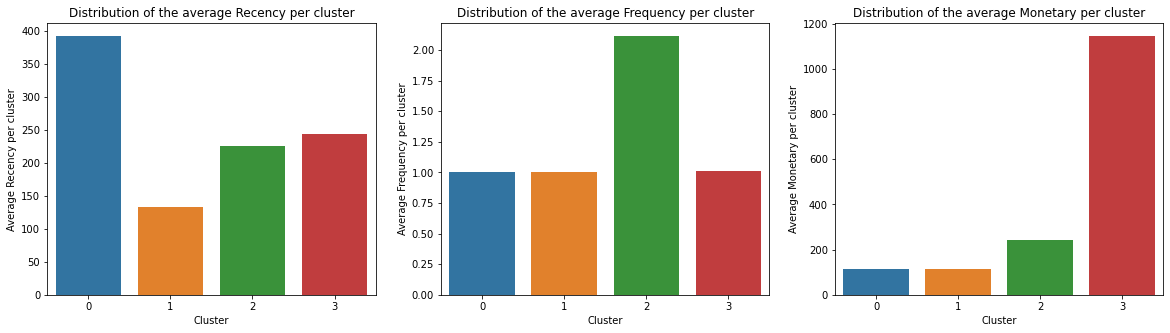

In [643]:
features_to_plot = ["Recency", "Frequency", "Monetary"]

display_barplot_avg_per_feature(df_grouped=avg_cluster, all_features=features_to_plot)

##### Display box plot per cluster and per feature

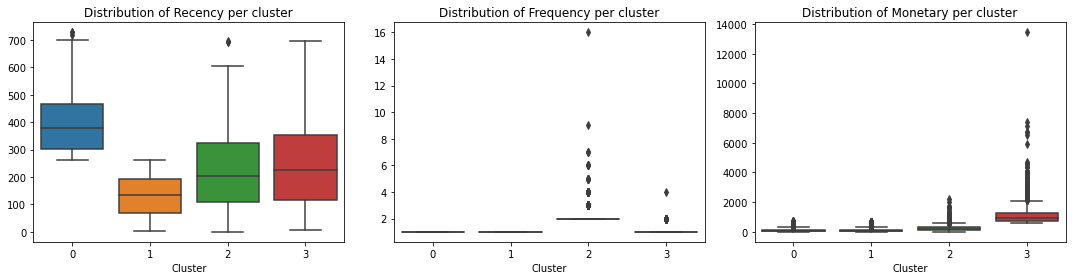

In [644]:
display_boxplot_per_feature(best_kmeans_dataset, all_features=features_to_plot, cluster_column_name="Customer_cluster")

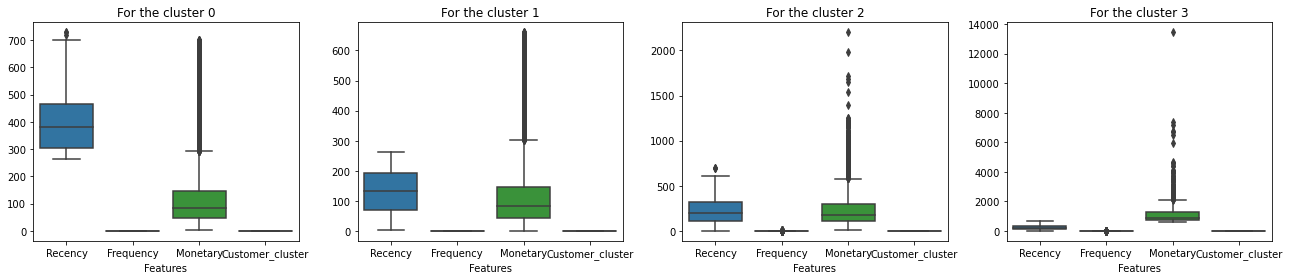

In [645]:
display_boxplot_per_cluster(best_kmeans_dataset, cluster_column_name="Customer_cluster")

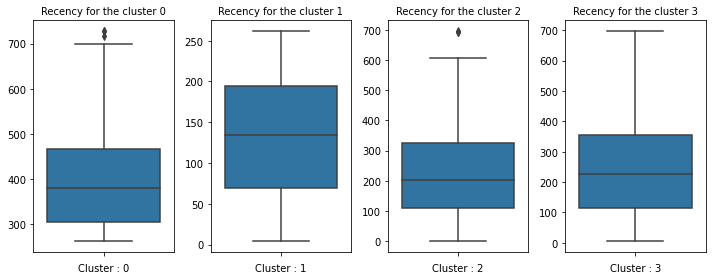

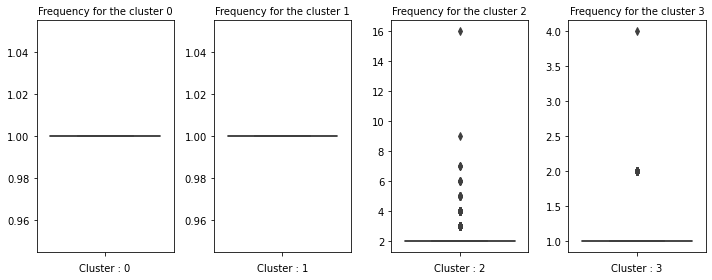

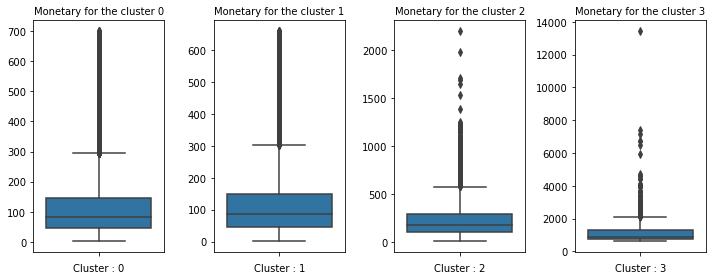

In [646]:
for feature in features_to_plot:
    display_boxplot_per_feature_per_cluster(best_kmeans_dataset, feature=feature, cluster_column_name="Customer_cluster")

##### Bivariate analysis (2D)

##### 3D representation of the clusters

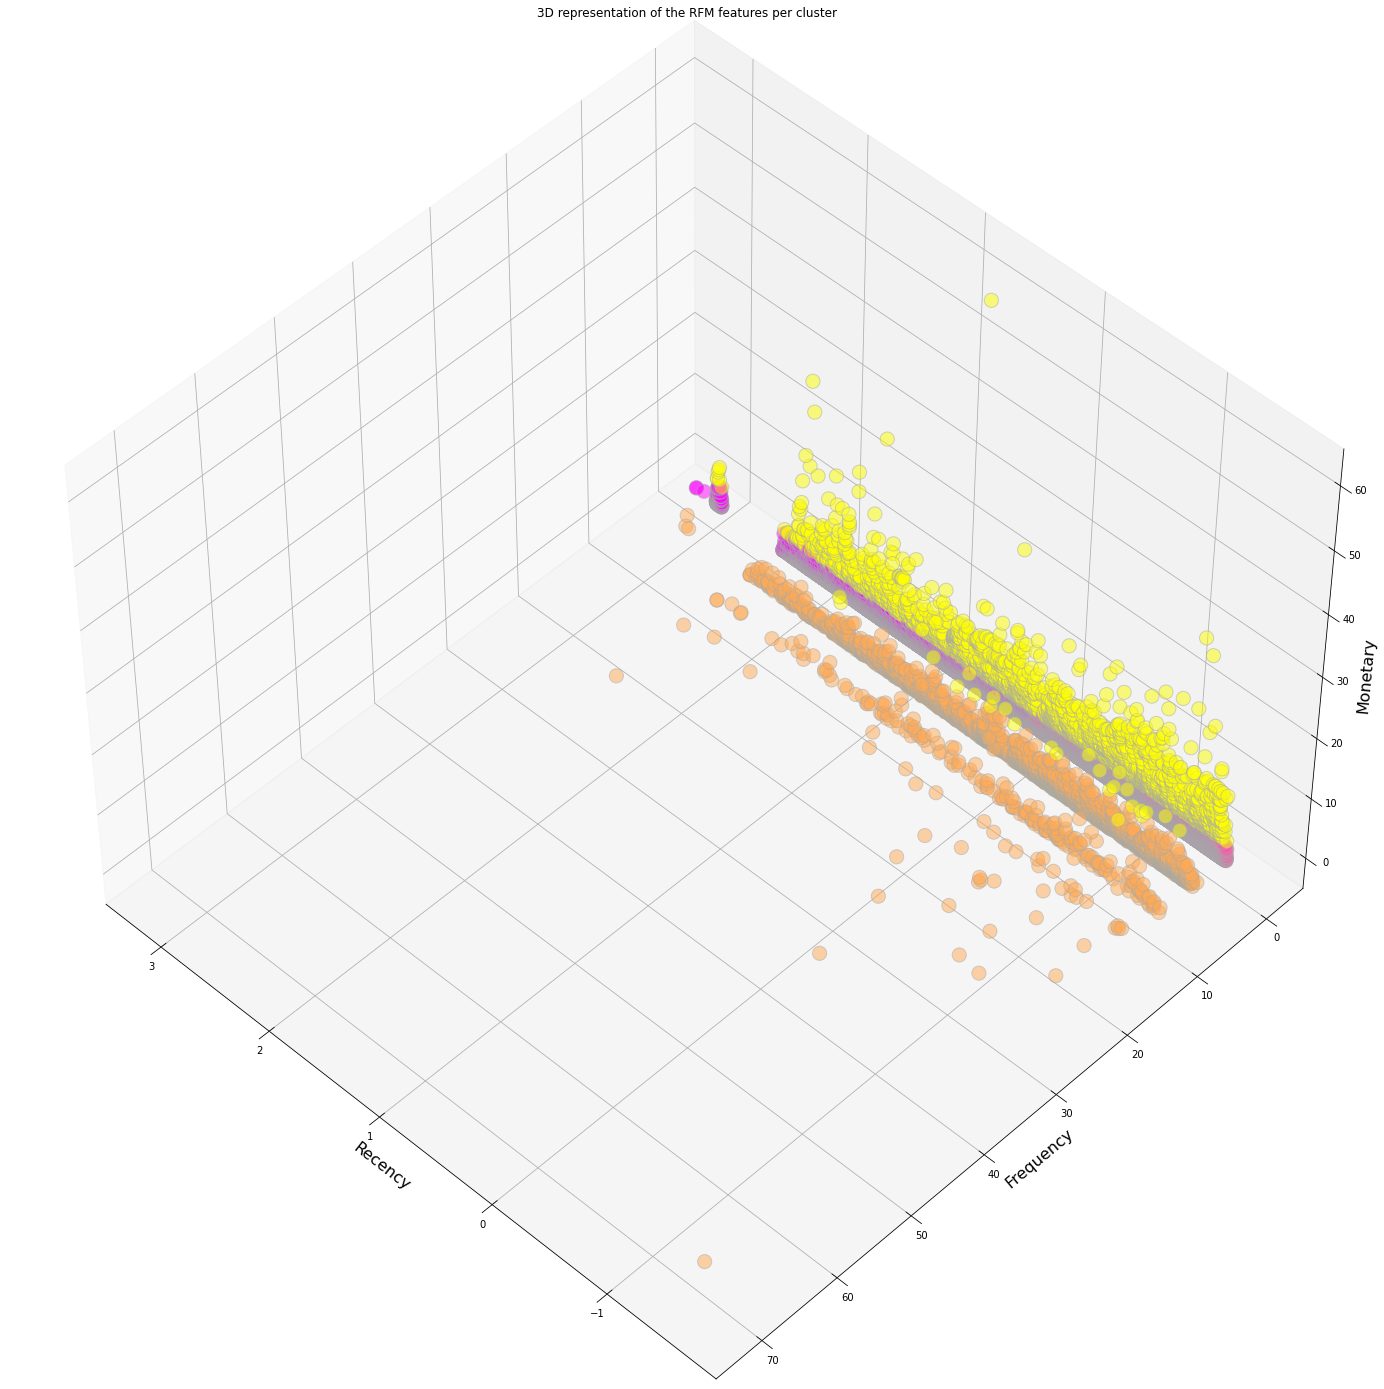

In [647]:
display_3D_rfm(X_norm, labels=best_kmeans.labels_)
#display_3D_rfm(best_kmeans_dataset, labels=best_kmeans_dataset["Customer_cluster"])

**Analysis**

In [648]:
list_cluster = sorted(avg_cluster.index.tolist())
list_cluster

[0, 1, 2, 3]

In [649]:
display_radar_normalized(avg_cluster, list_cluster)

we scale the grouped df so that we can have a better display on the radar plot


We have tried several visualizations to try to understand our 4 clusters.

This is the analysis of our segmentation :

- Cluster 0 (blue) : **lost customers**, customers that didn't buy recently nor ordered more than once and didn't make expensive purchases.
- Cluster 1 (red) : **new customers**, customers who have made a purchase recently.
- Cluster 2 (green) : **loyal customers**, customers that ordered more than once even though they didn't make expensive orders.
- Cluster 3 (purple) : **royal customers**, customers that made expensive purchases.

### 4) K-Means with review_score

In [650]:
dataset_rfm_review_score = load_data(input_path, "dataset_rfm_review_score.csv")
X = dataset_rfm_review_score.drop("customer_unique_id", axis=1).copy()

X_norm = X.copy()
X_norm[X_norm.columns] = scale(X)
print(X_norm.shape)

X_norm.head()

___Loading raw dataset___
Initial shape : (94721, 5)
(94721, 4)


,Recency,Frequency,Monetary,Review Score
0,-0.832036,-0.160271,-0.059304,0.676689
1,-0.812450,-0.160271,-0.569148,-0.077032
2,1.949190,-0.160271,-0.339029,-0.830752
3,0.538991,-0.160271,-0.536582,-0.077032
4,0.323544,-0.160271,0.170815,0.676689


K-Means minimises the inertia / intra-custer Variance.


<AxesSubplot:title={'center':'K-Means: The sum of inertia as a function of the number of clusters.'}>

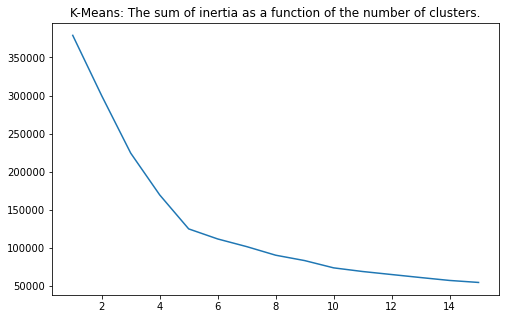

In [651]:
nb_clusters = 15
inertia = {}

for num_clusters in range(1, nb_clusters + 1):
    #print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                            verbose=0,
                            random_state=0).fit(X_norm)
    inertia[num_clusters] = kmeans_cluster.inertia_


print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))


[0.28102799 0.53782495]
The PCA with 2 components explains 53.800000000000004 % of the variance.


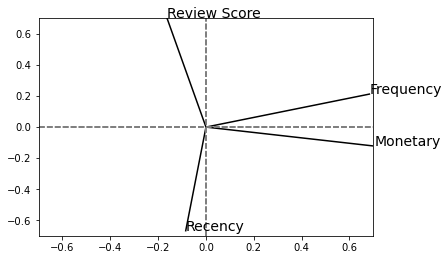

In [652]:

pca = PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())

# projeter X sur les composantes principales
X_pca = pca.transform(X_norm)
print("The PCA with 2 components explains", round(pca.explained_variance_ratio_.cumsum()[1], 3) * 100, "% of the variance.")
display_pca_components(pca, X_norm)

In [653]:
best_kmeans = KMeans(n_clusters=4,
                     verbose=0,
                     random_state=0).fit(X_norm)

# Saving clustering model
model = {'kmeans_rfm_review_score': best_kmeans}
filename = './model/kmeans_rfm_review_score.pkl'

with open(filename, "wb") as f: # wb writing
    pickle.dump(model, f)


Text(0.5, 1.0, 'Visualizing clusters with PCA')

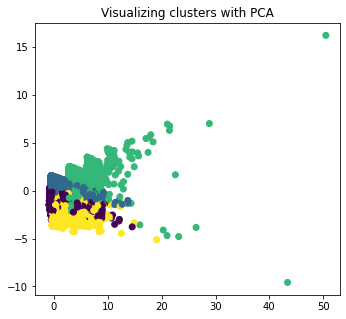

In [654]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=best_kmeans.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

In [655]:
best_kmeans_dataset = dataset_rfm_review_score.copy()

# we add a column that puts each customer into a cluster
best_kmeans_dataset['Customer_cluster'] = best_kmeans.labels_ # best_kmeans_dataset['Customer_cluster'] = best_kmeans.predict(X_norm)
display(best_kmeans_dataset.head())



,customer_unique_id,Recency,Frequency,Monetary,Review Score,Customer_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4.0,1
2,0000f46a3911fa3c0805444483337064,541,1,69.00,3.0,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,4.0,0
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,5.0,0


In [656]:
avg_cluster = best_kmeans_dataset.groupby("Customer_cluster").agg(
    {
        'customer_unique_id': 'count',
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'Review Score': 'mean'
    }
).rename(columns={'customer_unique_id': 'Nb customers',
                  'Recency': 'Avg Recency',
                  'Frequency': 'Avg Frequency',
                  'Monetary': 'Avg Monetary',
                  'Review Score': 'Avg Review Score'})


display(avg_cluster)

,Nb customers,Avg Recency,Avg Frequency,Avg Monetary,Avg Review Score
Customer_cluster,,,,,
0,32299,397.363107,1.000000,136.156248,4.632930
1,42776,126.224518,1.000000,131.160897,4.674245
2,2874,225.671190,2.112039,292.661889,4.145321
3,16772,243.384033,1.000000,159.662849,1.613791


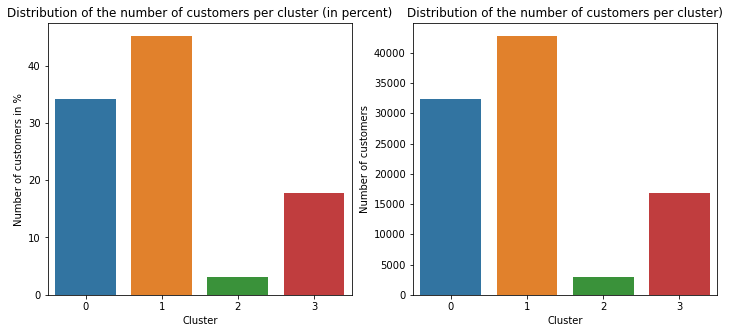

In [657]:
display_barplot_total_customers(grouped_df=avg_cluster)

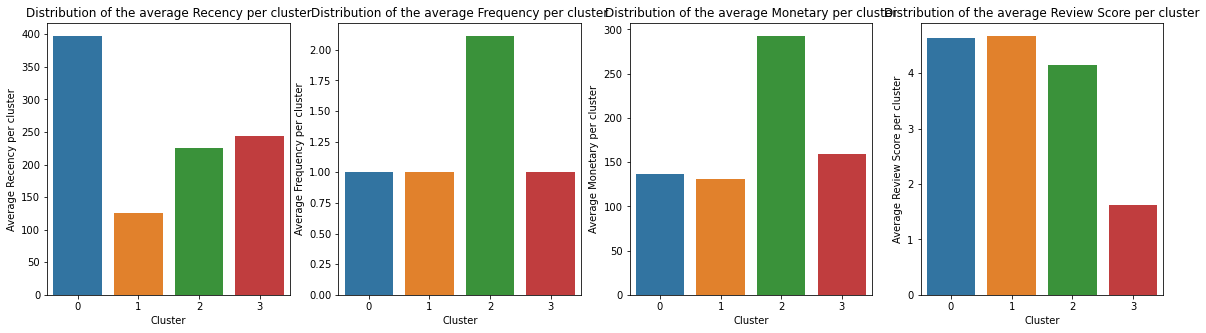

In [658]:
features_to_plot = ["Recency", "Frequency", "Monetary", "Review Score"]

display_barplot_avg_per_feature(df_grouped=avg_cluster, all_features=features_to_plot)

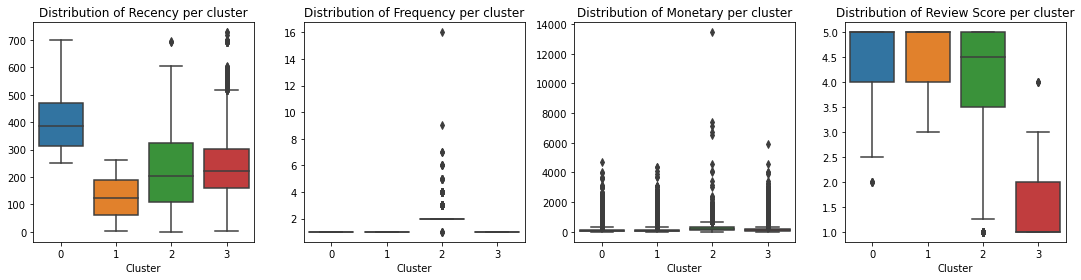

In [659]:
display_boxplot_per_feature(best_kmeans_dataset, all_features=features_to_plot, cluster_column_name="Customer_cluster")

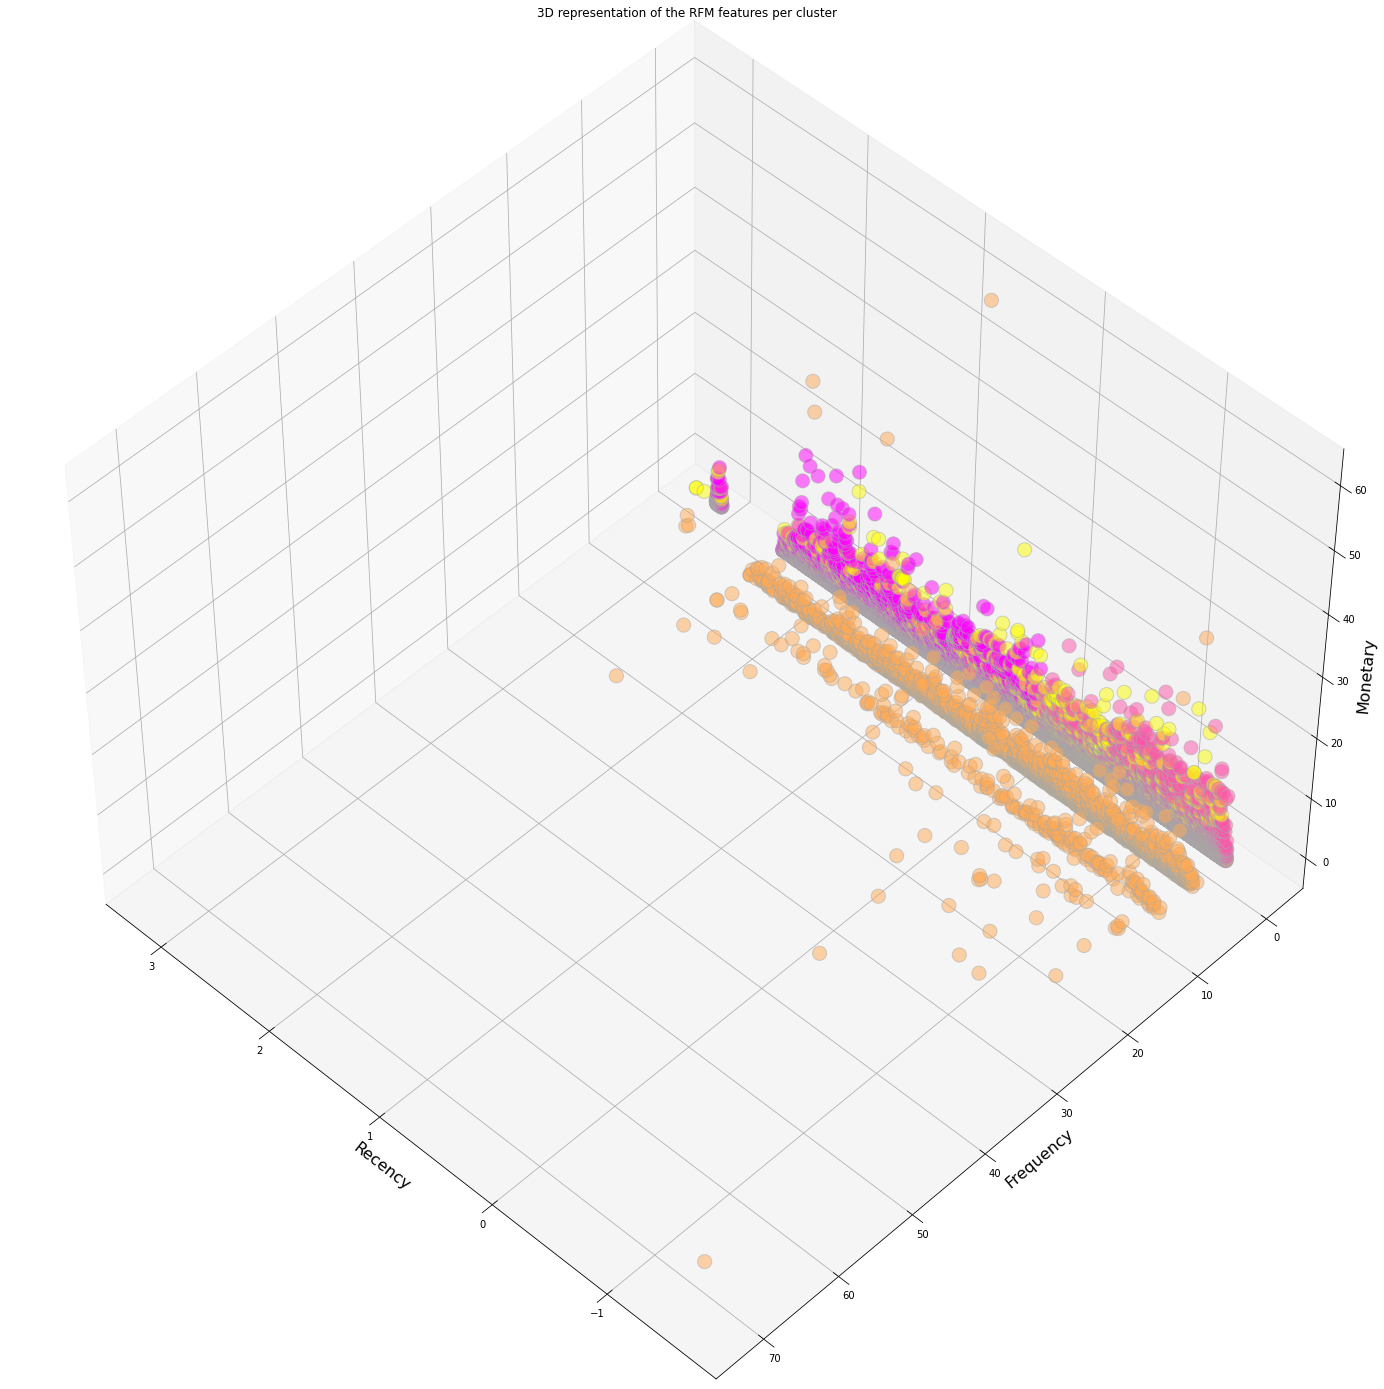

In [660]:
display_3D_rfm(X_norm, labels=best_kmeans.labels_)

In [661]:
display_radar_normalized(avg_cluster, list_cluster)

we scale the grouped df so that we can have a better display on the radar plot


We have tried several visualizations to try to understand our 4 clusters.

**By adding the review score we can see that we have an interesting cluster : the cluster 3 corresponds to unsatisfied clients !**

Adding the review score made our segments more explicit.

This is the analysis of our segmentation :

- Cluster 0 (blue) :  **lost customers**, customers that didn't buy recently nor ordered more than once and didn't make expensive purchases.

- Cluster 1 (red) : **new customers**, customers who have made a purchase recently.

- Cluster 2 (green) : **royal customers**, customers that ordered more than once and made expensive orders. They are mostly satisfied by the service offered.

- Cluster 3 (purple) : **new and unhappy customers**, customers gave a low review score.

### 5) Tried : RFM Score (Giving a rank to each customer based on RFM using K-Means)

##### Clustering RFM variables using K-Means

In [662]:
kmeans_cluster = KMeans(n_clusters=4, random_state=0)

In [663]:
rfm_columns = ['Recency','Frequency','Monetary']

In [664]:
rfm_clustering = apply_kmeans_per_column(dataset_rfm, rfm_columns, kmeans_cluster, n_clusters=4)

Before


Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
1                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
2                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                254.0  
1                728.0  
2                405.0  
3                127.0

After


Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
1                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
2                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                728.0  
1                405.0  
2                254.0  
3                127.0

Before


Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

After


Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

Before


Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
1                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
2                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  329.0    550.90  
1                  960.0   1520.88  
2                  109.0    175.66  
3                 2300.0  13440.00

After


Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
1                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
2                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  109.0    175.66  
1                  329.0    550.90  
2                  960.0   1520.88  
3                 2300.0  13440.00

In [665]:
display(rfm_clustering)

,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,0,0
2,0000f46a3911fa3c0805444483337064,541,1,69.00,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,0,1
...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,0,0,3
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,0,0
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,0,0,0
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,3,0,0


##### Segmentation as a function of RFM criteria : getting ideas

In [666]:
#rfm_clustering["RFM_score"] = rfm_clustering["Recency_cluster"] * 100 + rfm_clustering["Frequency_cluster"] * 10 + rfm_clustering["Monetary_cluster"]
rfm_clustering['RFM_score'] = rfm_clustering.Recency_cluster.astype(str) + rfm_clustering.Frequency_cluster.astype(str) + rfm_clustering.Monetary_cluster.astype(str)

display(rfm_clustering)

,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,0,0,300
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,0,0,300
2,0000f46a3911fa3c0805444483337064,541,1,69.00,0,0,0,000
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,0,0,100
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,0,1,101
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,0,0,3,003
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,0,0,100
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,0,0,0,000
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,3,0,0,300


In [667]:
rfm_clustering[["RFM_score"]].value_counts()

RFM_score
200          21546
300          20055
100          19302
000          12962
201           4516
301           4194
101           4100
001           2805
102            779
202            706
302            689
002            486
210            390
310            383
211            362
110            356
311            356
111            299
010            199
011            137
303            120
203             84
103             83
003             80
212             54
312             50
321             47
112             45
221             30
121             28
012             26
220             22
322             16
320             14
120             12
021             12
020             11
222             11
122             10
113              7
332              6
313              5
232              5
231              5
323              3
022              2
213              2
223              2
013              2
030              1
123              1
331              1
33

In [668]:
print("We have {} combinaisons possible here.".format(rfm_clustering["RFM_score"].nunique()))

n_clusters = 4
rfm_variables = 3
print("In theory, we would have {} combinaisons.".format(n_clusters ** rfm_variables))

We have 53 combinaisons possible here.
In theory, we would have 64 combinaisons.


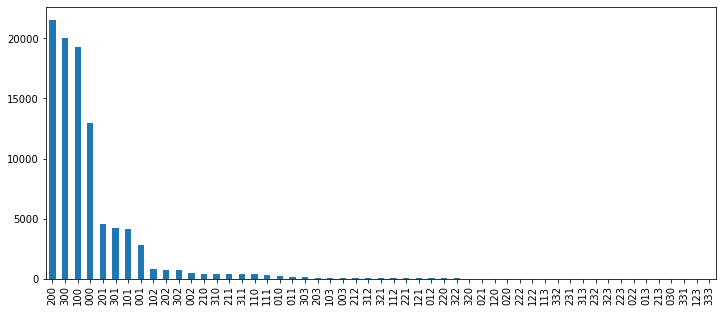

In [669]:
data = rfm_clustering['RFM_score']

fig = plt.figure(figsize=(12, 5))
data.value_counts().plot(kind='bar');

##### Specifying each cluster with describe

In [670]:
description_clustering = rfm_clustering.copy()

for i, rfm_variable in enumerate(["Recency", "Frequency", "Monetary"]):
    for j, rfm_cluster in enumerate(["Recency_cluster", "Frequency_cluster", "Monetary_cluster"]):
        if i == j:
            display(description_clustering[[rfm_cluster, rfm_variable]].groupby(rfm_cluster).describe())

Recency                                                     \
                   count        mean        std    min    25%    50%    75%   
Recency_cluster                                                               
0                16723.0  490.362973  58.790423  406.0  444.0  481.0  532.0   
1                25022.0  319.903285  44.061560  255.0  281.0  313.0  357.0   
2                27735.0  188.320606  35.263820  128.0  159.0  188.0  219.0   
3                25940.0   66.341403  36.097045    0.0   33.0   66.0  100.0   

                        
                   max  
Recency_cluster         
0                728.0  
1                405.0  
2                254.0  
3                127.0

Frequency                                              
                      count      mean       std  min  25%  50%  75%   max
Frequency_cluster                                                        
0                   92507.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0
1                    2673.0  2.000000  0.000000  2.0  2.0  2.0  2.0   2.0
2                     221.0  3.131222  0.338409  3.0  3.0  3.0  3.0   4.0
3                      19.0  6.368421  2.564946  5.0  5.0  6.0  6.5  16.0

Monetary                                                      \
                    count         mean          std      min      25%     50%   
Monetary_cluster                                                                
0                 75253.0    75.527705    43.316084     0.85    39.89    69.0   
1                 16892.0   275.783227    91.733765   175.79   199.90   249.0   
2                  2885.0   825.691875   241.741323   550.99   629.00   750.0   
3                   390.0  2223.861590  1007.485998  1534.90  1699.99  1980.0   

                                    
                     75%       max  
Monetary_cluster                    
0                  109.0    175.66  
1                  329.0    550.90  
2                  960.0   1520.88  
3                 2300.0  13440.00

In [671]:
recency_dict = {
    0: "two_years_ago_",
    1: "last_year_",
    2: "4-6_months_ago_",
    3: "0_4_months_ago_"
}

frequency_dict = {
    0: "1_order_",
    1: "2_orders_",
    2: "3_to_4_orders_",
    3: "more_than_5_orders_"
}

# 1 euro = 0.2 BRL
monetary_dict = {
    0: "up_to_176_BRL",
    1: "up_to_551_BRL",
    2: "up_to_1521_BRL",
    3: "up_to_13440_BRL"
}

##### Segmentation

In [672]:
rfm_clustering['Classification'] = 'none'

#filter_ = (rfm_clustering['Classification'] == 'none')

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 2) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0) # bought once
                   & (rfm_clustering['Classification'] == 'none'), # so that we won't over write classification
                   'Classification'] = recency_dict[2]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)
                    & (rfm_clustering['Classification'] == 'none'), # bought once
                   'Classification'] = recency_dict[3]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 1) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none') ,
                   'Classification'] = recency_dict[0]  + frequency_dict[0] + monetary_dict[0]


#Lowest-spending only_bought_once customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) & # bought recently or not sooo long ago
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought once
                   (rfm_clustering['Monetary_cluster'] <= 1)  # bought cheap stuff
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[1]


In [673]:
#Best Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
              & (rfm_clustering['Monetary_cluster'] == 3)#, #
                & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'top_customer'

#High-spending New Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) &
              (rfm_clustering['Frequency_cluster'] == 0) &
              (rfm_clustering['Monetary_cluster'] == 3)#, #
                  & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'high_spending_new_customer'

#Lowest-spending active loyal customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] != 0) &
                   (rfm_clustering['Frequency_cluster'] > 0) &
              (rfm_clustering['Monetary_cluster'] < 2)#, #
                  & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'low_spending_loyal_customer'

#Churned Best Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
              & (rfm_clustering['Frequency_cluster'] > 1)
                   & (rfm_clustering['Monetary_cluster'] == 3) #, #
                   & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'churned_top_customer'

In [674]:
data = rfm_clustering['Classification']

data.value_counts()

4-6_months_ago_1_order_up_to_176_BRL    21546
0_4_months_ago_1_order_up_to_176_BRL    20055
last_year_1_order_up_to_176_BRL         19302
two_years_ago_1_order_up_to_176_BRL     12962
none                                    12224
last_year_1_order_up_to_551_BRL          6905
low_spending_loyal_customer              2305
high_spending_new_customer                120
top_customer                                1
Name: Classification, dtype: int64

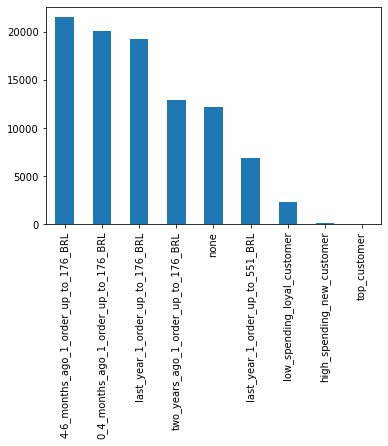

In [675]:
data.value_counts().plot(kind='bar');

In [676]:
print("To get a segmentation idea")
rfm_clustering[rfm_clustering['Classification'] == 'none']

To get a segmentation idea


,customer_unique_id,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,RFM_score,Classification
7,00053a61a98854899e70ed204dd4bafe,186,1,382.0,2,0,1,201,none
22,000fbf0473c10fc1ab6f8d2d286ce20c,38,1,285.8,3,0,1,301,none
53,0025795df7a7d077c4c90162fa820085,40,1,177.9,3,0,1,301,none
59,002aba8c1af80acacef6e011f9f23262,187,1,199.9,2,0,1,201,none
72,003162bf0351f47a1a247992b8b9b42d,50,1,514.9,3,0,1,301,none
...,...,...,...,...,...,...,...,...,...
95392,ffebb6424578e7bb153322da9d65634f,594,1,629.0,0,0,2,002,none
95407,fff5eb4918b2bf4b2da476788d42051c,62,1,1050.0,3,0,2,302,none
95409,fff7219c86179ca6441b8f37823ba3d3,249,1,245.8,2,0,1,201,none
95414,fffcc512b7dfecaffd80f13614af1d16,145,1,688.0,2,0,2,202,none


### 6) Tried : Customer Personas

https://ironfocus.com/blog/rfm-analysis-how-to-increase-your-sales/

In [677]:
personas = {
    "Brand Champion": {"R": 3, "F": 3, "M": 3},
    "Loyal Customers": {"R": 3, "F": 3, "M": 2},

    "Possibly Alienated_1": {"R": 0, "F": 2, "M": None},
    "Possibly Alienated_2": {"R": 0, "F": 3, "M": None},

    "Possibly Alienated_3": {"R": 1, "F": 2, "M": None},
    "Possibly Alienated_4": {"R": 1, "F": 3, "M": None},

    "New Customers": {"R": 3, "F": 0, "M": None},
    "One-off big spenders": {"R": 0, "F": 0, "M": 3},
    "Expired leads": {"R": 0, "F": 0, "M": 0},
}

In [678]:
rfm_clustering['Persona'] = 'none'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
                   & (rfm_clustering['Monetary_cluster'] == 3)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Brand Champion'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
                   & (rfm_clustering['Monetary_cluster'] == 2)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Loyal Customers'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) #| (rfm_clustering['Recency_cluster'] == 1)) # 0 or 1
                   & ((rfm_clustering['Frequency_cluster'] == 2) | (rfm_clustering['Frequency_cluster'] == 3))
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Possibly Alienated'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) #| (rfm_clustering['Recency_cluster'] == 1)) # 0 or 1
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'New Customers'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Monetary_cluster'] == 3)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'One-off big spenders'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Monetary_cluster'] == 0)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Expired leads'

In [679]:
data = rfm_clustering['Persona']

data.value_counts()

none                    57236
New Customers           25058
Expired leads           12962
One-off big spenders       80
Possibly Alienated         77
Loyal Customers             6
Brand Champion              1
Name: Persona, dtype: int64

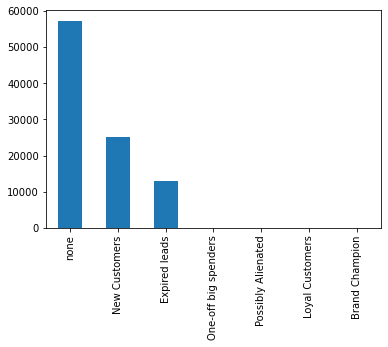

In [680]:
data.value_counts().plot(kind='bar');

### Conclusion
We have tried in this notebook different segmentation.

The chosen segmentation for our client Olist is the segmentation at part 4 : RFM and Review Score clustering using KMeans.
That method segments the customers into :
- lost customers
- new customers
- royal customers
- new and unhappy customers

It is a simple segmentation that can help the marketing team at Olist.

In [681]:
# End of try-outs time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 199.721939 sec
computing time : 00:03:19
